In [3]:
%load_ext autoreload
%autoreload 2

import torch
from torchvision import transforms

from mhist import get_MHIST_dataset
from networks import ConvNet
from utils import evaluate, get_daparam, get_dataset, get_network

from DataDAM import main_DataDAM

class EvaluateArgs():
    device = "cuda:0"
    lr_net = 0.01
    epoch_eval_train = 20
    batch_train = 256

    dsa = False
    dc_aug_param = {}

class DataDAMArgs():
    dataset = 'MHIST'
    model = 'ConvNet'
    ipc = 50
    eval_mode = 'SS'
    num_exp = 1
    num_eval = 200
    epoch_eval_train = 50
    Iteration = 10
    lr_img = 0.1
    lr_net = 0.01
    batch_real = 128
    batch_train = 128
    init = 'real'
    dsa_strategy = 'none'
    data_path = 'mhist_dataset/'
    zca = False
    save_path = 'MHIST_syn/real/'
    task_balance = 0.01
    method = 'DataDAM'

dataset_func = lambda dataset, data_path, im_size=(224, 224): get_MHIST_dataset(data_path, im_size)
network_func = lambda model, channel, num_classes, im_size: ConvNet(channel=channel, num_classes=num_classes, net_width=16, net_depth=7, net_act='relu', net_norm='instancenorm', net_pooling='avgpooling', im_size=im_size)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2a)

In [5]:
evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MHIST', 'ConvNet', 'ConvNet', 10)

channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = dataset_func('MHIST', 'mhist_dataset/')
ConvNet_7 = network_func('ConvNet', channel, num_classes, im_size)
images_all = [torch.unsqueeze(dst_train[i][0], dim=0) for i in range(len(dst_train))]
labels_all = [dst_train[i][1] for i in range(len(dst_train))]
images_all = torch.cat(images_all, dim=0)
labels_all = torch.tensor(labels_all, dtype=torch.long)

In [6]:
_, acc_train, acc_test = evaluate(0, ConvNet_7, images_all, labels_all, testloader, args = evaluate_args)

[2024-11-01 11:03:29] Evaluate_00: epoch = 0020 train time = 581 s train loss = 0.443514 train acc = 0.8041, test acc = 0.7400


# 2b)

In [4]:
data_DAM_args = DataDAMArgs()
main_DataDAM.main(dataset_func, network_func, data_DAM_args)

eval_it_pool:  [0]

================== Exp 0 ==================
 
Hyper-parameters: 
 {'device': 'cuda', 'dsa_param': <DataDAM.utils.ParamDiffAug object at 0x000001F33C98B910>, 'dsa': False}
Evaluation model pool:  ['ConvNet']


f:\Work\ECE1512\ProjectA\DataDAM\main_DataDAM.py:77: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  label_syn = torch.tensor([np.ones(args.ipc)*i for i in range(num_classes)], dtype=torch.long, requires_grad=False, device=args.device).view(-1) # [0,0,0, 1,1,1, ..., 9,9,9]


class c = 0: 1545 real images
class c = 1: 630 real images
real images channel 0, mean = 0.0001, std = 1.0002
real images channel 1, mean = -0.0001, std = 0.9998
real images channel 2, mean = 0.0003, std = 1.0000
initialize synthetic data from random real images
[2024-11-01 10:16:02] training begins
-------------------------
Evaluation
model_train = ConvNet, model_eval = ConvNet, iteration = 0
DSA augmentation strategy: 
 none
DSA augmentation parameters: 
 {'aug_mode': 'S', 'prob_flip': 0.5, 'ratio_scale': 1.2, 'ratio_rotate': 15.0, 'ratio_crop_pad': 0.125, 'ratio_cutout': 0.5, 'brightness': 1.0, 'saturation': 2.0, 'contrast': 0.5}


100%|██████████| 51/51 [00:04<00:00, 12.25it/s]


[2024-11-01 10:16:11] Evaluate_00: epoch = 0050 train time = 4 s train loss = 0.322615 train acc = 0.9900, test acc = 0.5118


100%|██████████| 51/51 [00:03<00:00, 13.29it/s]


[2024-11-01 10:16:18] Evaluate_01: epoch = 0050 train time = 3 s train loss = 0.390501 train acc = 0.9500, test acc = 0.5159


100%|██████████| 51/51 [00:03<00:00, 13.23it/s]


[2024-11-01 10:16:25] Evaluate_02: epoch = 0050 train time = 3 s train loss = 0.366724 train acc = 0.9800, test acc = 0.5353


100%|██████████| 51/51 [00:03<00:00, 13.26it/s]


[2024-11-01 10:16:31] Evaluate_03: epoch = 0050 train time = 3 s train loss = 0.460382 train acc = 0.9400, test acc = 0.5026


100%|██████████| 51/51 [00:03<00:00, 13.29it/s]


[2024-11-01 10:16:38] Evaluate_04: epoch = 0050 train time = 3 s train loss = 0.367887 train acc = 0.9900, test acc = 0.5476


100%|██████████| 51/51 [00:03<00:00, 13.26it/s]


[2024-11-01 10:16:44] Evaluate_05: epoch = 0050 train time = 3 s train loss = 0.317182 train acc = 0.9800, test acc = 0.4923


100%|██████████| 51/51 [00:24<00:00,  2.08it/s]


[2024-11-01 10:17:17] Evaluate_06: epoch = 0050 train time = 24 s train loss = 0.389200 train acc = 0.9400, test acc = 0.5159


100%|██████████| 51/51 [00:08<00:00,  6.11it/s]


[2024-11-01 10:17:29] Evaluate_07: epoch = 0050 train time = 8 s train loss = 0.403674 train acc = 0.9800, test acc = 0.5343


100%|██████████| 51/51 [00:08<00:00,  6.30it/s]


[2024-11-01 10:17:42] Evaluate_08: epoch = 0050 train time = 8 s train loss = 0.430298 train acc = 0.9600, test acc = 0.5435


100%|██████████| 51/51 [00:07<00:00,  6.42it/s]


[2024-11-01 10:17:54] Evaluate_09: epoch = 0050 train time = 7 s train loss = 0.309326 train acc = 0.9900, test acc = 0.4985


100%|██████████| 51/51 [00:08<00:00,  6.30it/s]


[2024-11-01 10:18:06] Evaluate_10: epoch = 0050 train time = 8 s train loss = 0.280926 train acc = 0.9900, test acc = 0.5486


100%|██████████| 51/51 [00:08<00:00,  6.33it/s]


[2024-11-01 10:18:18] Evaluate_11: epoch = 0050 train time = 8 s train loss = 0.491764 train acc = 0.8600, test acc = 0.5118


100%|██████████| 51/51 [00:07<00:00,  6.98it/s]


[2024-11-01 10:18:28] Evaluate_12: epoch = 0050 train time = 7 s train loss = 0.243516 train acc = 0.9900, test acc = 0.5486


100%|██████████| 51/51 [00:08<00:00,  6.29it/s]


[2024-11-01 10:18:41] Evaluate_13: epoch = 0050 train time = 8 s train loss = 0.368775 train acc = 0.9800, test acc = 0.5333


100%|██████████| 51/51 [00:08<00:00,  6.17it/s]


[2024-11-01 10:18:53] Evaluate_14: epoch = 0050 train time = 8 s train loss = 0.288235 train acc = 0.9900, test acc = 0.5660


100%|██████████| 51/51 [00:08<00:00,  6.25it/s]


[2024-11-01 10:19:05] Evaluate_15: epoch = 0050 train time = 8 s train loss = 0.435955 train acc = 0.9300, test acc = 0.5281


100%|██████████| 51/51 [00:07<00:00,  6.78it/s]


[2024-11-01 10:19:16] Evaluate_16: epoch = 0050 train time = 7 s train loss = 0.432539 train acc = 0.9000, test acc = 0.5302


100%|██████████| 51/51 [00:07<00:00,  6.91it/s]


[2024-11-01 10:19:27] Evaluate_17: epoch = 0050 train time = 7 s train loss = 0.299260 train acc = 0.9900, test acc = 0.5281


100%|██████████| 51/51 [00:07<00:00,  6.85it/s]


[2024-11-01 10:19:39] Evaluate_18: epoch = 0050 train time = 7 s train loss = 0.302489 train acc = 1.0000, test acc = 0.5056


100%|██████████| 51/51 [00:06<00:00,  7.29it/s]


[2024-11-01 10:19:49] Evaluate_19: epoch = 0050 train time = 6 s train loss = 0.410371 train acc = 0.9700, test acc = 0.5466


100%|██████████| 51/51 [00:07<00:00,  6.38it/s]


[2024-11-01 10:20:01] Evaluate_20: epoch = 0050 train time = 7 s train loss = 0.379424 train acc = 0.9600, test acc = 0.5455


100%|██████████| 51/51 [00:07<00:00,  7.28it/s]


[2024-11-01 10:20:12] Evaluate_21: epoch = 0050 train time = 7 s train loss = 0.314998 train acc = 0.9900, test acc = 0.5435


100%|██████████| 51/51 [00:14<00:00,  3.53it/s]


[2024-11-01 10:20:30] Evaluate_22: epoch = 0050 train time = 14 s train loss = 0.389709 train acc = 0.9900, test acc = 0.5507


100%|██████████| 51/51 [00:06<00:00,  7.99it/s]


[2024-11-01 10:20:40] Evaluate_23: epoch = 0050 train time = 6 s train loss = 0.349534 train acc = 0.9900, test acc = 0.5169


100%|██████████| 51/51 [00:06<00:00,  8.22it/s]


[2024-11-01 10:20:50] Evaluate_24: epoch = 0050 train time = 6 s train loss = 0.405710 train acc = 0.9800, test acc = 0.5455


100%|██████████| 51/51 [00:06<00:00,  7.94it/s]


[2024-11-01 10:21:00] Evaluate_25: epoch = 0050 train time = 6 s train loss = 0.315452 train acc = 0.9800, test acc = 0.5322


100%|██████████| 51/51 [00:06<00:00,  7.75it/s]


[2024-11-01 10:21:10] Evaluate_26: epoch = 0050 train time = 6 s train loss = 0.363840 train acc = 0.9600, test acc = 0.5466


100%|██████████| 51/51 [00:06<00:00,  8.24it/s]


[2024-11-01 10:21:19] Evaluate_27: epoch = 0050 train time = 6 s train loss = 0.444928 train acc = 0.9300, test acc = 0.5343


100%|██████████| 51/51 [00:06<00:00,  8.14it/s]


[2024-11-01 10:21:29] Evaluate_28: epoch = 0050 train time = 6 s train loss = 0.389972 train acc = 0.9800, test acc = 0.5292


100%|██████████| 51/51 [00:06<00:00,  7.69it/s]


[2024-11-01 10:21:39] Evaluate_29: epoch = 0050 train time = 6 s train loss = 0.257946 train acc = 1.0000, test acc = 0.5056


100%|██████████| 51/51 [00:06<00:00,  8.50it/s]


[2024-11-01 10:21:49] Evaluate_30: epoch = 0050 train time = 6 s train loss = 0.425277 train acc = 0.9500, test acc = 0.5271


100%|██████████| 51/51 [00:06<00:00,  7.99it/s]


[2024-11-01 10:21:59] Evaluate_31: epoch = 0050 train time = 6 s train loss = 0.500958 train acc = 0.8900, test acc = 0.5107


100%|██████████| 51/51 [00:06<00:00,  8.14it/s]


[2024-11-01 10:22:08] Evaluate_32: epoch = 0050 train time = 6 s train loss = 0.367447 train acc = 0.9800, test acc = 0.5179


100%|██████████| 51/51 [00:05<00:00,  8.59it/s]


[2024-11-01 10:22:18] Evaluate_33: epoch = 0050 train time = 5 s train loss = 0.401026 train acc = 0.9400, test acc = 0.5415


100%|██████████| 51/51 [00:05<00:00,  9.21it/s]


[2024-11-01 10:22:27] Evaluate_34: epoch = 0050 train time = 5 s train loss = 0.334570 train acc = 0.9800, test acc = 0.5599


100%|██████████| 51/51 [00:06<00:00,  8.21it/s]


[2024-11-01 10:22:37] Evaluate_35: epoch = 0050 train time = 6 s train loss = 0.413546 train acc = 0.9600, test acc = 0.5558


100%|██████████| 51/51 [00:06<00:00,  8.44it/s]


[2024-11-01 10:22:46] Evaluate_36: epoch = 0050 train time = 6 s train loss = 0.325055 train acc = 0.9800, test acc = 0.5159


100%|██████████| 51/51 [00:06<00:00,  8.47it/s]


[2024-11-01 10:22:56] Evaluate_37: epoch = 0050 train time = 6 s train loss = 0.296976 train acc = 0.9900, test acc = 0.5097


100%|██████████| 51/51 [00:05<00:00,  8.57it/s]


[2024-11-01 10:23:05] Evaluate_38: epoch = 0050 train time = 5 s train loss = 0.476212 train acc = 0.8900, test acc = 0.5200


100%|██████████| 51/51 [00:06<00:00,  8.22it/s]


[2024-11-01 10:23:15] Evaluate_39: epoch = 0050 train time = 6 s train loss = 0.343959 train acc = 1.0000, test acc = 0.5200


100%|██████████| 51/51 [00:05<00:00,  8.58it/s]


[2024-11-01 10:23:24] Evaluate_40: epoch = 0050 train time = 5 s train loss = 0.291975 train acc = 0.9900, test acc = 0.5015


100%|██████████| 51/51 [00:06<00:00,  8.30it/s]


[2024-11-01 10:23:34] Evaluate_41: epoch = 0050 train time = 6 s train loss = 0.270630 train acc = 1.0000, test acc = 0.5773


100%|██████████| 51/51 [00:05<00:00,  9.07it/s]


[2024-11-01 10:23:43] Evaluate_42: epoch = 0050 train time = 5 s train loss = 0.390686 train acc = 0.9500, test acc = 0.4974


100%|██████████| 51/51 [00:05<00:00,  8.80it/s]


[2024-11-01 10:23:52] Evaluate_43: epoch = 0050 train time = 5 s train loss = 0.330791 train acc = 0.9900, test acc = 0.5189


100%|██████████| 51/51 [00:05<00:00,  8.56it/s]


[2024-11-01 10:24:02] Evaluate_44: epoch = 0050 train time = 5 s train loss = 0.417803 train acc = 0.9600, test acc = 0.5026


100%|██████████| 51/51 [00:06<00:00,  8.38it/s]


[2024-11-01 10:24:14] Evaluate_45: epoch = 0050 train time = 6 s train loss = 0.406988 train acc = 0.9800, test acc = 0.5578


100%|██████████| 51/51 [00:10<00:00,  4.77it/s]


[2024-11-01 10:24:28] Evaluate_46: epoch = 0050 train time = 10 s train loss = 0.299381 train acc = 0.9600, test acc = 0.5353


100%|██████████| 51/51 [00:06<00:00,  7.78it/s]


[2024-11-01 10:24:38] Evaluate_47: epoch = 0050 train time = 6 s train loss = 0.425111 train acc = 1.0000, test acc = 0.5384


100%|██████████| 51/51 [00:06<00:00,  8.33it/s]


[2024-11-01 10:24:48] Evaluate_48: epoch = 0050 train time = 6 s train loss = 0.314955 train acc = 0.9900, test acc = 0.5343


100%|██████████| 51/51 [00:06<00:00,  8.02it/s]


[2024-11-01 10:24:58] Evaluate_49: epoch = 0050 train time = 6 s train loss = 0.311878 train acc = 0.9900, test acc = 0.5067


100%|██████████| 51/51 [00:06<00:00,  8.05it/s]


[2024-11-01 10:25:08] Evaluate_50: epoch = 0050 train time = 6 s train loss = 0.375176 train acc = 0.9900, test acc = 0.6029


100%|██████████| 51/51 [00:06<00:00,  8.22it/s]


[2024-11-01 10:25:17] Evaluate_51: epoch = 0050 train time = 6 s train loss = 0.364296 train acc = 0.9600, test acc = 0.5281


100%|██████████| 51/51 [00:06<00:00,  7.98it/s]


[2024-11-01 10:25:27] Evaluate_52: epoch = 0050 train time = 6 s train loss = 0.374077 train acc = 1.0000, test acc = 0.5281


100%|██████████| 51/51 [00:06<00:00,  8.24it/s]


[2024-11-01 10:25:37] Evaluate_53: epoch = 0050 train time = 6 s train loss = 0.427268 train acc = 0.9500, test acc = 0.5548


100%|██████████| 51/51 [00:06<00:00,  8.00it/s]


[2024-11-01 10:25:47] Evaluate_54: epoch = 0050 train time = 6 s train loss = 0.384437 train acc = 0.9300, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  7.85it/s]


[2024-11-01 10:25:57] Evaluate_55: epoch = 0050 train time = 6 s train loss = 0.432086 train acc = 0.9600, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  8.03it/s]


[2024-11-01 10:26:07] Evaluate_56: epoch = 0050 train time = 6 s train loss = 0.359323 train acc = 0.9700, test acc = 0.5281


100%|██████████| 51/51 [00:06<00:00,  8.07it/s]


[2024-11-01 10:26:17] Evaluate_57: epoch = 0050 train time = 6 s train loss = 0.415992 train acc = 0.9800, test acc = 0.5394


100%|██████████| 51/51 [00:06<00:00,  8.38it/s]


[2024-11-01 10:26:26] Evaluate_58: epoch = 0050 train time = 6 s train loss = 0.439420 train acc = 0.9500, test acc = 0.5701


100%|██████████| 51/51 [00:13<00:00,  3.74it/s]


[2024-11-01 10:26:43] Evaluate_59: epoch = 0050 train time = 13 s train loss = 0.432047 train acc = 0.9300, test acc = 0.5333


100%|██████████| 51/51 [00:06<00:00,  8.38it/s]


[2024-11-01 10:26:53] Evaluate_60: epoch = 0050 train time = 6 s train loss = 0.351191 train acc = 0.9800, test acc = 0.5578


100%|██████████| 51/51 [00:06<00:00,  7.98it/s]


[2024-11-01 10:27:03] Evaluate_61: epoch = 0050 train time = 6 s train loss = 0.342386 train acc = 0.9900, test acc = 0.5220


100%|██████████| 51/51 [00:06<00:00,  8.35it/s]


[2024-11-01 10:27:13] Evaluate_62: epoch = 0050 train time = 6 s train loss = 0.379568 train acc = 0.9900, test acc = 0.5148


100%|██████████| 51/51 [00:06<00:00,  8.13it/s]


[2024-11-01 10:27:22] Evaluate_63: epoch = 0050 train time = 6 s train loss = 0.333637 train acc = 0.9800, test acc = 0.5343


100%|██████████| 51/51 [00:05<00:00,  8.95it/s]


[2024-11-01 10:27:31] Evaluate_64: epoch = 0050 train time = 5 s train loss = 0.273530 train acc = 0.9900, test acc = 0.5803


100%|██████████| 51/51 [00:05<00:00,  8.64it/s]


[2024-11-01 10:27:41] Evaluate_65: epoch = 0050 train time = 5 s train loss = 0.406041 train acc = 0.9900, test acc = 0.5568


100%|██████████| 51/51 [00:06<00:00,  7.90it/s]


[2024-11-01 10:27:51] Evaluate_66: epoch = 0050 train time = 6 s train loss = 0.348277 train acc = 0.9700, test acc = 0.5138


100%|██████████| 51/51 [00:06<00:00,  7.94it/s]


[2024-11-01 10:28:00] Evaluate_67: epoch = 0050 train time = 6 s train loss = 0.328074 train acc = 1.0000, test acc = 0.4841


100%|██████████| 51/51 [00:05<00:00,  9.17it/s]


[2024-11-01 10:28:09] Evaluate_68: epoch = 0050 train time = 5 s train loss = 0.404390 train acc = 0.9500, test acc = 0.5189


100%|██████████| 51/51 [00:06<00:00,  8.05it/s]


[2024-11-01 10:28:19] Evaluate_69: epoch = 0050 train time = 6 s train loss = 0.447751 train acc = 0.9800, test acc = 0.5548


100%|██████████| 51/51 [00:06<00:00,  8.14it/s]


[2024-11-01 10:28:29] Evaluate_70: epoch = 0050 train time = 6 s train loss = 0.314208 train acc = 0.9600, test acc = 0.5537


100%|██████████| 51/51 [00:06<00:00,  7.98it/s]


[2024-11-01 10:28:39] Evaluate_71: epoch = 0050 train time = 6 s train loss = 0.344056 train acc = 0.9600, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  8.08it/s]


[2024-11-01 10:28:49] Evaluate_72: epoch = 0050 train time = 6 s train loss = 0.324348 train acc = 0.9800, test acc = 0.5292


100%|██████████| 51/51 [00:06<00:00,  8.03it/s]


[2024-11-01 10:28:58] Evaluate_73: epoch = 0050 train time = 6 s train loss = 0.421589 train acc = 0.9500, test acc = 0.5445


100%|██████████| 51/51 [00:06<00:00,  8.29it/s]


[2024-11-01 10:29:08] Evaluate_74: epoch = 0050 train time = 6 s train loss = 0.314106 train acc = 0.9900, test acc = 0.5056


100%|██████████| 51/51 [00:06<00:00,  8.23it/s]


[2024-11-01 10:29:18] Evaluate_75: epoch = 0050 train time = 6 s train loss = 0.437423 train acc = 0.9800, test acc = 0.5343


100%|██████████| 51/51 [00:06<00:00,  8.26it/s]


[2024-11-01 10:29:27] Evaluate_76: epoch = 0050 train time = 6 s train loss = 0.433656 train acc = 0.8900, test acc = 0.5046


100%|██████████| 51/51 [00:06<00:00,  8.04it/s]


[2024-11-01 10:29:37] Evaluate_77: epoch = 0050 train time = 6 s train loss = 0.439841 train acc = 0.9700, test acc = 0.5599


100%|██████████| 51/51 [00:05<00:00,  8.91it/s]


[2024-11-01 10:29:46] Evaluate_78: epoch = 0050 train time = 5 s train loss = 0.341954 train acc = 1.0000, test acc = 0.5056


100%|██████████| 51/51 [00:06<00:00,  7.73it/s]


[2024-11-01 10:29:56] Evaluate_79: epoch = 0050 train time = 6 s train loss = 0.322914 train acc = 1.0000, test acc = 0.5455


100%|██████████| 51/51 [00:06<00:00,  8.27it/s]


[2024-11-01 10:30:06] Evaluate_80: epoch = 0050 train time = 6 s train loss = 0.324149 train acc = 0.9900, test acc = 0.4811


100%|██████████| 51/51 [00:06<00:00,  8.12it/s]


[2024-11-01 10:30:16] Evaluate_81: epoch = 0050 train time = 6 s train loss = 0.357571 train acc = 0.9900, test acc = 0.5353


100%|██████████| 51/51 [00:06<00:00,  7.77it/s]


[2024-11-01 10:30:26] Evaluate_82: epoch = 0050 train time = 6 s train loss = 0.461145 train acc = 0.9000, test acc = 0.5486


100%|██████████| 51/51 [00:05<00:00,  8.62it/s]


[2024-11-01 10:30:35] Evaluate_83: epoch = 0050 train time = 5 s train loss = 0.340011 train acc = 0.9800, test acc = 0.5455


100%|██████████| 51/51 [00:06<00:00,  8.50it/s]


[2024-11-01 10:30:45] Evaluate_84: epoch = 0050 train time = 6 s train loss = 0.351079 train acc = 0.9900, test acc = 0.5486


100%|██████████| 51/51 [00:06<00:00,  8.00it/s]


[2024-11-01 10:30:55] Evaluate_85: epoch = 0050 train time = 6 s train loss = 0.335036 train acc = 0.9900, test acc = 0.4759


100%|██████████| 51/51 [00:06<00:00,  8.10it/s]


[2024-11-01 10:31:04] Evaluate_86: epoch = 0050 train time = 6 s train loss = 0.270003 train acc = 1.0000, test acc = 0.5271


100%|██████████| 51/51 [00:06<00:00,  8.49it/s]


[2024-11-01 10:31:14] Evaluate_87: epoch = 0050 train time = 6 s train loss = 0.320654 train acc = 1.0000, test acc = 0.5517


100%|██████████| 51/51 [00:05<00:00,  8.64it/s]


[2024-11-01 10:31:23] Evaluate_88: epoch = 0050 train time = 5 s train loss = 0.316886 train acc = 1.0000, test acc = 0.6131


100%|██████████| 51/51 [00:05<00:00,  9.46it/s]


[2024-11-01 10:31:36] Evaluate_89: epoch = 0050 train time = 5 s train loss = 0.325683 train acc = 0.9900, test acc = 0.5415


100%|██████████| 51/51 [00:09<00:00,  5.31it/s]


[2024-11-01 10:31:49] Evaluate_90: epoch = 0050 train time = 9 s train loss = 0.345235 train acc = 0.9900, test acc = 0.5670


100%|██████████| 51/51 [00:05<00:00,  8.53it/s]


[2024-11-01 10:31:58] Evaluate_91: epoch = 0050 train time = 5 s train loss = 0.357707 train acc = 0.9700, test acc = 0.5097


100%|██████████| 51/51 [00:05<00:00,  8.94it/s]


[2024-11-01 10:32:07] Evaluate_92: epoch = 0050 train time = 5 s train loss = 0.338068 train acc = 0.9700, test acc = 0.5312


100%|██████████| 51/51 [00:06<00:00,  7.85it/s]


[2024-11-01 10:32:18] Evaluate_93: epoch = 0050 train time = 6 s train loss = 0.377473 train acc = 0.9900, test acc = 0.5496


100%|██████████| 51/51 [00:06<00:00,  8.16it/s]


[2024-11-01 10:32:27] Evaluate_94: epoch = 0050 train time = 6 s train loss = 0.359043 train acc = 0.9700, test acc = 0.5230


100%|██████████| 51/51 [00:06<00:00,  8.32it/s]


[2024-11-01 10:32:37] Evaluate_95: epoch = 0050 train time = 6 s train loss = 0.376826 train acc = 0.9800, test acc = 0.5435


100%|██████████| 51/51 [00:05<00:00,  8.59it/s]


[2024-11-01 10:32:46] Evaluate_96: epoch = 0050 train time = 5 s train loss = 0.323029 train acc = 1.0000, test acc = 0.5691


100%|██████████| 51/51 [00:06<00:00,  8.10it/s]


[2024-11-01 10:32:56] Evaluate_97: epoch = 0050 train time = 6 s train loss = 0.369080 train acc = 0.9600, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  8.34it/s]


[2024-11-01 10:33:06] Evaluate_98: epoch = 0050 train time = 6 s train loss = 0.295151 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:05<00:00,  8.69it/s]


[2024-11-01 10:33:15] Evaluate_99: epoch = 0050 train time = 5 s train loss = 0.413211 train acc = 0.9700, test acc = 0.5056


100%|██████████| 51/51 [00:06<00:00,  8.37it/s]


[2024-11-01 10:33:25] Evaluate_100: epoch = 0050 train time = 6 s train loss = 0.369547 train acc = 0.9800, test acc = 0.5148


100%|██████████| 51/51 [00:05<00:00,  8.56it/s]


[2024-11-01 10:33:34] Evaluate_101: epoch = 0050 train time = 5 s train loss = 0.388917 train acc = 0.9700, test acc = 0.5425


100%|██████████| 51/51 [00:06<00:00,  8.33it/s]


[2024-11-01 10:33:44] Evaluate_102: epoch = 0050 train time = 6 s train loss = 0.361147 train acc = 0.9900, test acc = 0.5384


100%|██████████| 51/51 [00:05<00:00,  8.75it/s]


[2024-11-01 10:33:53] Evaluate_103: epoch = 0050 train time = 5 s train loss = 0.373068 train acc = 0.9400, test acc = 0.4964


100%|██████████| 51/51 [00:05<00:00,  9.38it/s]


[2024-11-01 10:34:02] Evaluate_104: epoch = 0050 train time = 5 s train loss = 0.420290 train acc = 0.9700, test acc = 0.5445


100%|██████████| 51/51 [00:06<00:00,  8.26it/s]


[2024-11-01 10:34:12] Evaluate_105: epoch = 0050 train time = 6 s train loss = 0.351348 train acc = 0.9800, test acc = 0.5302


100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


[2024-11-01 10:34:29] Evaluate_106: epoch = 0050 train time = 13 s train loss = 0.428537 train acc = 0.9500, test acc = 0.5640


100%|██████████| 51/51 [00:07<00:00,  6.80it/s]


[2024-11-01 10:34:40] Evaluate_107: epoch = 0050 train time = 7 s train loss = 0.364757 train acc = 0.9900, test acc = 0.5333


100%|██████████| 51/51 [00:07<00:00,  6.64it/s]


[2024-11-01 10:34:51] Evaluate_108: epoch = 0050 train time = 7 s train loss = 0.480031 train acc = 0.9300, test acc = 0.5005


100%|██████████| 51/51 [00:07<00:00,  7.25it/s]


[2024-11-01 10:35:02] Evaluate_109: epoch = 0050 train time = 7 s train loss = 0.317367 train acc = 0.9900, test acc = 0.5404


100%|██████████| 51/51 [00:07<00:00,  7.17it/s]


[2024-11-01 10:35:12] Evaluate_110: epoch = 0050 train time = 7 s train loss = 0.289951 train acc = 0.9700, test acc = 0.5128


100%|██████████| 51/51 [00:06<00:00,  7.48it/s]


[2024-11-01 10:35:22] Evaluate_111: epoch = 0050 train time = 6 s train loss = 0.376216 train acc = 0.9700, test acc = 0.5292


100%|██████████| 51/51 [00:06<00:00,  7.41it/s]


[2024-11-01 10:35:33] Evaluate_112: epoch = 0050 train time = 6 s train loss = 0.316317 train acc = 0.9900, test acc = 0.5701


100%|██████████| 51/51 [00:06<00:00,  7.62it/s]


[2024-11-01 10:35:43] Evaluate_113: epoch = 0050 train time = 6 s train loss = 0.339880 train acc = 1.0000, test acc = 0.5353


100%|██████████| 51/51 [00:06<00:00,  7.35it/s]


[2024-11-01 10:35:53] Evaluate_114: epoch = 0050 train time = 6 s train loss = 0.372214 train acc = 0.9900, test acc = 0.5363


100%|██████████| 51/51 [00:06<00:00,  7.64it/s]


[2024-11-01 10:36:03] Evaluate_115: epoch = 0050 train time = 6 s train loss = 0.304746 train acc = 1.0000, test acc = 0.5415


100%|██████████| 51/51 [00:07<00:00,  7.16it/s]


[2024-11-01 10:36:14] Evaluate_116: epoch = 0050 train time = 7 s train loss = 0.391696 train acc = 1.0000, test acc = 0.4964


100%|██████████| 51/51 [00:06<00:00,  7.31it/s]


[2024-11-01 10:36:24] Evaluate_117: epoch = 0050 train time = 6 s train loss = 0.375582 train acc = 0.9900, test acc = 0.5711


100%|██████████| 51/51 [00:06<00:00,  7.57it/s]


[2024-11-01 10:36:34] Evaluate_118: epoch = 0050 train time = 6 s train loss = 0.323213 train acc = 0.9800, test acc = 0.5732


100%|██████████| 51/51 [00:06<00:00,  7.52it/s]


[2024-11-01 10:36:45] Evaluate_119: epoch = 0050 train time = 6 s train loss = 0.392296 train acc = 0.9800, test acc = 0.4872


100%|██████████| 51/51 [00:06<00:00,  7.65it/s]


[2024-11-01 10:36:55] Evaluate_120: epoch = 0050 train time = 6 s train loss = 0.359309 train acc = 0.9800, test acc = 0.5619


100%|██████████| 51/51 [00:06<00:00,  7.96it/s]


[2024-11-01 10:37:05] Evaluate_121: epoch = 0050 train time = 6 s train loss = 0.356248 train acc = 1.0000, test acc = 0.5752


100%|██████████| 51/51 [00:06<00:00,  8.02it/s]


[2024-11-01 10:37:14] Evaluate_122: epoch = 0050 train time = 6 s train loss = 0.360151 train acc = 1.0000, test acc = 0.5322


100%|██████████| 51/51 [00:06<00:00,  7.76it/s]


[2024-11-01 10:37:24] Evaluate_123: epoch = 0050 train time = 6 s train loss = 0.422556 train acc = 0.9400, test acc = 0.5230


100%|██████████| 51/51 [00:06<00:00,  7.48it/s]


[2024-11-01 10:37:35] Evaluate_124: epoch = 0050 train time = 6 s train loss = 0.319736 train acc = 0.9900, test acc = 0.5466


100%|██████████| 51/51 [00:06<00:00,  7.73it/s]


[2024-11-01 10:37:44] Evaluate_125: epoch = 0050 train time = 6 s train loss = 0.271649 train acc = 0.9900, test acc = 0.5210


100%|██████████| 51/51 [00:05<00:00,  8.82it/s]


[2024-11-01 10:37:53] Evaluate_126: epoch = 0050 train time = 5 s train loss = 0.269224 train acc = 1.0000, test acc = 0.5138


100%|██████████| 51/51 [00:06<00:00,  7.44it/s]


[2024-11-01 10:38:04] Evaluate_127: epoch = 0050 train time = 6 s train loss = 0.358124 train acc = 1.0000, test acc = 0.5138


100%|██████████| 51/51 [00:06<00:00,  8.18it/s]


[2024-11-01 10:38:13] Evaluate_128: epoch = 0050 train time = 6 s train loss = 0.399655 train acc = 0.9500, test acc = 0.5210


100%|██████████| 51/51 [00:06<00:00,  7.58it/s]


[2024-11-01 10:38:24] Evaluate_129: epoch = 0050 train time = 6 s train loss = 0.395011 train acc = 1.0000, test acc = 0.5261


100%|██████████| 51/51 [00:06<00:00,  7.62it/s]


[2024-11-01 10:38:34] Evaluate_130: epoch = 0050 train time = 6 s train loss = 0.363648 train acc = 0.9700, test acc = 0.5271


100%|██████████| 51/51 [00:06<00:00,  7.39it/s]


[2024-11-01 10:38:45] Evaluate_131: epoch = 0050 train time = 6 s train loss = 0.383904 train acc = 0.9600, test acc = 0.5046


100%|██████████| 51/51 [00:07<00:00,  7.09it/s]


[2024-11-01 10:38:58] Evaluate_132: epoch = 0050 train time = 7 s train loss = 0.435664 train acc = 0.9400, test acc = 0.5281


100%|██████████| 51/51 [00:07<00:00,  6.75it/s]


[2024-11-01 10:39:09] Evaluate_133: epoch = 0050 train time = 7 s train loss = 0.235698 train acc = 1.0000, test acc = 0.5599


100%|██████████| 51/51 [00:06<00:00,  7.50it/s]


[2024-11-01 10:39:20] Evaluate_134: epoch = 0050 train time = 6 s train loss = 0.322604 train acc = 0.9900, test acc = 0.5394


100%|██████████| 51/51 [00:06<00:00,  7.77it/s]


[2024-11-01 10:39:30] Evaluate_135: epoch = 0050 train time = 6 s train loss = 0.290116 train acc = 1.0000, test acc = 0.5220


100%|██████████| 51/51 [00:07<00:00,  7.27it/s]


[2024-11-01 10:39:41] Evaluate_136: epoch = 0050 train time = 7 s train loss = 0.541278 train acc = 0.8700, test acc = 0.5486


100%|██████████| 51/51 [00:06<00:00,  7.55it/s]


[2024-11-01 10:39:51] Evaluate_137: epoch = 0050 train time = 6 s train loss = 0.339930 train acc = 0.9800, test acc = 0.5548


100%|██████████| 51/51 [00:06<00:00,  8.40it/s]


[2024-11-01 10:40:01] Evaluate_138: epoch = 0050 train time = 6 s train loss = 0.422342 train acc = 0.9800, test acc = 0.5322


100%|██████████| 51/51 [00:06<00:00,  7.40it/s]


[2024-11-01 10:40:11] Evaluate_139: epoch = 0050 train time = 6 s train loss = 0.367238 train acc = 0.9900, test acc = 0.5363


100%|██████████| 51/51 [00:06<00:00,  7.49it/s]


[2024-11-01 10:40:22] Evaluate_140: epoch = 0050 train time = 6 s train loss = 0.268643 train acc = 1.0000, test acc = 0.5681


100%|██████████| 51/51 [00:06<00:00,  7.62it/s]


[2024-11-01 10:40:32] Evaluate_141: epoch = 0050 train time = 6 s train loss = 0.216461 train acc = 1.0000, test acc = 0.5026


100%|██████████| 51/51 [00:06<00:00,  7.79it/s]


[2024-11-01 10:40:42] Evaluate_142: epoch = 0050 train time = 6 s train loss = 0.383971 train acc = 0.9700, test acc = 0.4811


100%|██████████| 51/51 [00:06<00:00,  7.50it/s]


[2024-11-01 10:40:52] Evaluate_143: epoch = 0050 train time = 6 s train loss = 0.394357 train acc = 0.9800, test acc = 0.5210


100%|██████████| 51/51 [00:06<00:00,  7.45it/s]


[2024-11-01 10:41:02] Evaluate_144: epoch = 0050 train time = 6 s train loss = 0.324732 train acc = 0.9800, test acc = 0.5169


100%|██████████| 51/51 [00:06<00:00,  7.64it/s]


[2024-11-01 10:41:13] Evaluate_145: epoch = 0050 train time = 6 s train loss = 0.375150 train acc = 0.9800, test acc = 0.5210


100%|██████████| 51/51 [00:06<00:00,  7.53it/s]


[2024-11-01 10:41:23] Evaluate_146: epoch = 0050 train time = 6 s train loss = 0.321832 train acc = 0.9800, test acc = 0.5486


100%|██████████| 51/51 [00:06<00:00,  7.60it/s]


[2024-11-01 10:41:33] Evaluate_147: epoch = 0050 train time = 6 s train loss = 0.427369 train acc = 0.9500, test acc = 0.5097


100%|██████████| 51/51 [00:06<00:00,  7.45it/s]


[2024-11-01 10:41:43] Evaluate_148: epoch = 0050 train time = 6 s train loss = 0.425146 train acc = 0.9800, test acc = 0.5241


100%|██████████| 51/51 [00:06<00:00,  7.74it/s]


[2024-11-01 10:41:53] Evaluate_149: epoch = 0050 train time = 6 s train loss = 0.382731 train acc = 0.9800, test acc = 0.5527


100%|██████████| 51/51 [00:06<00:00,  7.37it/s]


[2024-11-01 10:42:04] Evaluate_150: epoch = 0050 train time = 6 s train loss = 0.377774 train acc = 0.9900, test acc = 0.5302


100%|██████████| 51/51 [00:06<00:00,  7.51it/s]


[2024-11-01 10:42:14] Evaluate_151: epoch = 0050 train time = 6 s train loss = 0.350821 train acc = 1.0000, test acc = 0.5957


100%|██████████| 51/51 [00:06<00:00,  7.70it/s]


[2024-11-01 10:42:24] Evaluate_152: epoch = 0050 train time = 6 s train loss = 0.303428 train acc = 0.9900, test acc = 0.5660


100%|██████████| 51/51 [00:06<00:00,  8.23it/s]


[2024-11-01 10:42:33] Evaluate_153: epoch = 0050 train time = 6 s train loss = 0.441752 train acc = 1.0000, test acc = 0.5097


100%|██████████| 51/51 [00:06<00:00,  7.73it/s]


[2024-11-01 10:42:43] Evaluate_154: epoch = 0050 train time = 6 s train loss = 0.287408 train acc = 1.0000, test acc = 0.4770


100%|██████████| 51/51 [00:06<00:00,  7.66it/s]


[2024-11-01 10:42:54] Evaluate_155: epoch = 0050 train time = 6 s train loss = 0.440927 train acc = 0.9600, test acc = 0.5210


100%|██████████| 51/51 [00:06<00:00,  7.57it/s]


[2024-11-01 10:43:04] Evaluate_156: epoch = 0050 train time = 6 s train loss = 0.468354 train acc = 0.9200, test acc = 0.4811


100%|██████████| 51/51 [00:06<00:00,  8.30it/s]


[2024-11-01 10:43:13] Evaluate_157: epoch = 0050 train time = 6 s train loss = 0.363128 train acc = 0.9800, test acc = 0.5374


100%|██████████| 51/51 [00:06<00:00,  8.08it/s]


[2024-11-01 10:43:23] Evaluate_158: epoch = 0050 train time = 6 s train loss = 0.384244 train acc = 0.9900, test acc = 0.5445


100%|██████████| 51/51 [00:05<00:00,  8.52it/s]


[2024-11-01 10:43:32] Evaluate_159: epoch = 0050 train time = 5 s train loss = 0.356770 train acc = 0.9900, test acc = 0.5517


100%|██████████| 51/51 [00:06<00:00,  7.60it/s]


[2024-11-01 10:43:42] Evaluate_160: epoch = 0050 train time = 6 s train loss = 0.436308 train acc = 0.9700, test acc = 0.5363


100%|██████████| 51/51 [00:06<00:00,  7.55it/s]


[2024-11-01 10:43:52] Evaluate_161: epoch = 0050 train time = 6 s train loss = 0.403461 train acc = 0.9200, test acc = 0.4985


100%|██████████| 51/51 [00:06<00:00,  7.42it/s]


[2024-11-01 10:44:03] Evaluate_162: epoch = 0050 train time = 6 s train loss = 0.461981 train acc = 0.9300, test acc = 0.5445


100%|██████████| 51/51 [00:06<00:00,  8.31it/s]


[2024-11-01 10:44:12] Evaluate_163: epoch = 0050 train time = 6 s train loss = 0.489527 train acc = 0.9400, test acc = 0.5067


100%|██████████| 51/51 [00:06<00:00,  7.90it/s]


[2024-11-01 10:44:22] Evaluate_164: epoch = 0050 train time = 6 s train loss = 0.298821 train acc = 0.9800, test acc = 0.5200


100%|██████████| 51/51 [00:06<00:00,  7.60it/s]


[2024-11-01 10:44:32] Evaluate_165: epoch = 0050 train time = 6 s train loss = 0.334065 train acc = 1.0000, test acc = 0.5640


100%|██████████| 51/51 [00:06<00:00,  8.33it/s]


[2024-11-01 10:44:41] Evaluate_166: epoch = 0050 train time = 6 s train loss = 0.391026 train acc = 0.9800, test acc = 0.5026


100%|██████████| 51/51 [00:06<00:00,  7.93it/s]


[2024-11-01 10:44:51] Evaluate_167: epoch = 0050 train time = 6 s train loss = 0.343733 train acc = 0.9900, test acc = 0.5670


100%|██████████| 51/51 [00:06<00:00,  8.06it/s]


[2024-11-01 10:45:01] Evaluate_168: epoch = 0050 train time = 6 s train loss = 0.441302 train acc = 0.9500, test acc = 0.5496


100%|██████████| 51/51 [00:06<00:00,  7.69it/s]


[2024-11-01 10:45:11] Evaluate_169: epoch = 0050 train time = 6 s train loss = 0.294581 train acc = 1.0000, test acc = 0.5353


100%|██████████| 51/51 [00:06<00:00,  7.71it/s]


[2024-11-01 10:45:21] Evaluate_170: epoch = 0050 train time = 6 s train loss = 0.330046 train acc = 0.9800, test acc = 0.5435


100%|██████████| 51/51 [00:06<00:00,  7.52it/s]


[2024-11-01 10:45:31] Evaluate_171: epoch = 0050 train time = 6 s train loss = 0.404977 train acc = 0.9900, test acc = 0.5937


100%|██████████| 51/51 [00:06<00:00,  7.79it/s]


[2024-11-01 10:45:41] Evaluate_172: epoch = 0050 train time = 6 s train loss = 0.398010 train acc = 0.9700, test acc = 0.4974


100%|██████████| 51/51 [00:06<00:00,  7.52it/s]


[2024-11-01 10:45:51] Evaluate_173: epoch = 0050 train time = 6 s train loss = 0.239509 train acc = 0.9900, test acc = 0.5189


100%|██████████| 51/51 [00:06<00:00,  7.75it/s]


[2024-11-01 10:46:01] Evaluate_174: epoch = 0050 train time = 6 s train loss = 0.323550 train acc = 0.9900, test acc = 0.5067


100%|██████████| 51/51 [00:06<00:00,  7.90it/s]


[2024-11-01 10:46:11] Evaluate_175: epoch = 0050 train time = 6 s train loss = 0.410483 train acc = 0.9200, test acc = 0.5343


100%|██████████| 51/51 [00:06<00:00,  7.83it/s]


[2024-11-01 10:46:21] Evaluate_176: epoch = 0050 train time = 6 s train loss = 0.365016 train acc = 0.9900, test acc = 0.5476


100%|██████████| 51/51 [00:06<00:00,  7.50it/s]


[2024-11-01 10:46:31] Evaluate_177: epoch = 0050 train time = 6 s train loss = 0.311723 train acc = 0.9900, test acc = 0.5343


100%|██████████| 51/51 [00:06<00:00,  7.51it/s]


[2024-11-01 10:46:42] Evaluate_178: epoch = 0050 train time = 6 s train loss = 0.399987 train acc = 0.9700, test acc = 0.5445


100%|██████████| 51/51 [00:06<00:00,  7.73it/s]


[2024-11-01 10:46:52] Evaluate_179: epoch = 0050 train time = 6 s train loss = 0.411627 train acc = 0.9600, test acc = 0.5200


100%|██████████| 51/51 [00:06<00:00,  7.97it/s]


[2024-11-01 10:47:01] Evaluate_180: epoch = 0050 train time = 6 s train loss = 0.295403 train acc = 0.9700, test acc = 0.5036


100%|██████████| 51/51 [00:06<00:00,  7.84it/s]


[2024-11-01 10:47:11] Evaluate_181: epoch = 0050 train time = 6 s train loss = 0.241257 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:06<00:00,  8.48it/s]


[2024-11-01 10:47:21] Evaluate_182: epoch = 0050 train time = 6 s train loss = 0.406324 train acc = 0.9900, test acc = 0.5537


100%|██████████| 51/51 [00:06<00:00,  7.39it/s]


[2024-11-01 10:47:31] Evaluate_183: epoch = 0050 train time = 6 s train loss = 0.388015 train acc = 0.9700, test acc = 0.5363


100%|██████████| 51/51 [00:06<00:00,  8.36it/s]


[2024-11-01 10:47:40] Evaluate_184: epoch = 0050 train time = 6 s train loss = 0.384429 train acc = 0.9600, test acc = 0.5353


100%|██████████| 51/51 [00:06<00:00,  7.45it/s]


[2024-11-01 10:47:51] Evaluate_185: epoch = 0050 train time = 6 s train loss = 0.339262 train acc = 1.0000, test acc = 0.5159


100%|██████████| 51/51 [00:06<00:00,  7.69it/s]


[2024-11-01 10:48:01] Evaluate_186: epoch = 0050 train time = 6 s train loss = 0.461171 train acc = 0.9700, test acc = 0.4964


100%|██████████| 51/51 [00:06<00:00,  7.59it/s]


[2024-11-01 10:48:11] Evaluate_187: epoch = 0050 train time = 6 s train loss = 0.346274 train acc = 0.9800, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  7.57it/s]


[2024-11-01 10:48:21] Evaluate_188: epoch = 0050 train time = 6 s train loss = 0.245572 train acc = 1.0000, test acc = 0.5619


100%|██████████| 51/51 [00:06<00:00,  7.49it/s]


[2024-11-01 10:48:31] Evaluate_189: epoch = 0050 train time = 6 s train loss = 0.397121 train acc = 0.9800, test acc = 0.4944


100%|██████████| 51/51 [00:06<00:00,  8.01it/s]


[2024-11-01 10:48:41] Evaluate_190: epoch = 0050 train time = 6 s train loss = 0.403943 train acc = 0.9600, test acc = 0.5241


100%|██████████| 51/51 [00:06<00:00,  7.84it/s]


[2024-11-01 10:48:51] Evaluate_191: epoch = 0050 train time = 6 s train loss = 0.315527 train acc = 1.0000, test acc = 0.5466


100%|██████████| 51/51 [00:06<00:00,  7.54it/s]


[2024-11-01 10:49:01] Evaluate_192: epoch = 0050 train time = 6 s train loss = 0.295683 train acc = 0.9900, test acc = 0.5251


100%|██████████| 51/51 [00:06<00:00,  7.59it/s]


[2024-11-01 10:49:12] Evaluate_193: epoch = 0050 train time = 6 s train loss = 0.343923 train acc = 0.9900, test acc = 0.5466


100%|██████████| 51/51 [00:06<00:00,  7.58it/s]


[2024-11-01 10:49:22] Evaluate_194: epoch = 0050 train time = 6 s train loss = 0.305087 train acc = 0.9900, test acc = 0.5834


100%|██████████| 51/51 [00:06<00:00,  7.36it/s]


[2024-11-01 10:49:32] Evaluate_195: epoch = 0050 train time = 6 s train loss = 0.436240 train acc = 0.9500, test acc = 0.5425


100%|██████████| 51/51 [00:06<00:00,  7.68it/s]


[2024-11-01 10:49:42] Evaluate_196: epoch = 0050 train time = 6 s train loss = 0.352138 train acc = 1.0000, test acc = 0.5517


100%|██████████| 51/51 [00:06<00:00,  7.46it/s]


[2024-11-01 10:49:53] Evaluate_197: epoch = 0050 train time = 6 s train loss = 0.332222 train acc = 0.9800, test acc = 0.5087


100%|██████████| 51/51 [00:06<00:00,  7.80it/s]


[2024-11-01 10:50:02] Evaluate_198: epoch = 0050 train time = 6 s train loss = 0.404660 train acc = 0.9100, test acc = 0.5241


100%|██████████| 51/51 [00:05<00:00,  8.76it/s]


[2024-11-01 10:50:11] Evaluate_199: epoch = 0050 train time = 5 s train loss = 0.391596 train acc = 0.9900, test acc = 0.5363
TOTAL TIME WAS:  204.92770268917084
Evaluate 200 random ConvNet, mean = 0.5323 std = 0.0240
-------------------------
[2024-11-01 10:50:17] iter = 00000, loss = 2.0555
[2024-11-01 10:51:08] iter = 00010, loss = 2.6099

==================== Final Results ====================

Run 1 experiments, train on ConvNet, evaluate 0 random ConvNet, mean  = nan%  std = nan%

==================== Maximum Results ====================

Run 1 experiments, train on ConvNet, evaluate 200 random ConvNet, mean  = 53.23%  std = 2.40%

==================== Top 5 Results ====================

Run 1 experiments, train on ConvNet, evaluate 200 random ConvNet, mean  = 61.31%  std = 0.00%


c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

# 2c)

C:\Users\colin\AppData\Local\Temp\ipykernel_22840\2353593421.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  syn_dict = torch.load(syn_path)


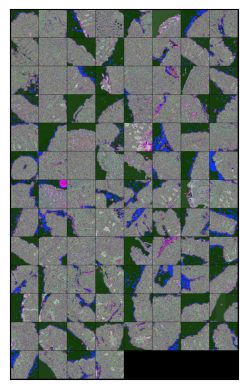

In [7]:
import os
from torchvision.utils import make_grid

from utils import save

data_DAM_args = DataDAMArgs()

syn_path = os.path.join(data_DAM_args.save_path, 'res_%s_%s_%s_%dipc_.pt'%(data_DAM_args.method, data_DAM_args.dataset, data_DAM_args.model, data_DAM_args.ipc))
syn_dict = torch.load(syn_path)

image_syn = syn_dict['data'][-1][0]
label_syn = syn_dict['data'][-1][1]

grid = make_grid(image_syn.detach().cpu())
save(grid, './mhist_syn_real.png')

# 2d)

In [8]:
data_DAM_args = DataDAMArgs()
data_DAM_args.init = 'noise'
data_DAM_args.save_path = 'MHIST_syn/noise/'
main_DataDAM.main(dataset_func, network_func, data_DAM_args)

eval_it_pool:  [0]

================== Exp 0 ==================
 
Hyper-parameters: 
 {'init': 'noise', 'save_path': 'MHIST_syn/noise/', 'device': 'cuda', 'dsa_param': <DataDAM.utils.ParamDiffAug object at 0x000001F38B0F7730>, 'dsa': False}
Evaluation model pool:  ['ConvNet']
class c = 0: 1545 real images
class c = 1: 630 real images
real images channel 0, mean = 0.0001, std = 1.0002
real images channel 1, mean = -0.0001, std = 0.9998
real images channel 2, mean = 0.0003, std = 1.0000
initialize synthetic data from random noise
[2024-11-01 11:05:52] training begins
-------------------------
Evaluation
model_train = ConvNet, model_eval = ConvNet, iteration = 0
DSA augmentation strategy: 
 none
DSA augmentation parameters: 
 {'aug_mode': 'S', 'prob_flip': 0.5, 'ratio_scale': 1.2, 'ratio_rotate': 15.0, 'ratio_crop_pad': 0.125, 'ratio_cutout': 0.5, 'brightness': 1.0, 'saturation': 2.0, 'contrast': 0.5}


100%|██████████| 51/51 [11:01<00:00, 12.97s/it] 


[2024-11-01 11:16:57] Evaluate_00: epoch = 0050 train time = 661 s train loss = 0.217926 train acc = 1.0000, test acc = 0.5558


100%|██████████| 51/51 [00:52<00:00,  1.02s/it]


[2024-11-01 11:17:53] Evaluate_01: epoch = 0050 train time = 52 s train loss = 0.121950 train acc = 1.0000, test acc = 0.4330


100%|██████████| 51/51 [00:50<00:00,  1.01it/s]


[2024-11-01 11:18:47] Evaluate_02: epoch = 0050 train time = 50 s train loss = 0.203541 train acc = 1.0000, test acc = 0.5711


100%|██████████| 51/51 [00:48<00:00,  1.05it/s]


[2024-11-01 11:19:39] Evaluate_03: epoch = 0050 train time = 48 s train loss = 0.191370 train acc = 1.0000, test acc = 0.4596


100%|██████████| 51/51 [00:50<00:00,  1.00it/s]


[2024-11-01 11:20:34] Evaluate_04: epoch = 0050 train time = 50 s train loss = 0.180283 train acc = 1.0000, test acc = 0.4872


100%|██████████| 51/51 [00:49<00:00,  1.04it/s]


[2024-11-01 11:21:27] Evaluate_05: epoch = 0050 train time = 49 s train loss = 0.231597 train acc = 1.0000, test acc = 0.5824


100%|██████████| 51/51 [00:49<00:00,  1.03it/s]


[2024-11-01 11:22:20] Evaluate_06: epoch = 0050 train time = 49 s train loss = 0.185852 train acc = 1.0000, test acc = 0.5773


100%|██████████| 51/51 [00:51<00:00,  1.01s/it]


[2024-11-01 11:23:16] Evaluate_07: epoch = 0050 train time = 51 s train loss = 0.134789 train acc = 1.0000, test acc = 0.4923


100%|██████████| 51/51 [00:48<00:00,  1.05it/s]


[2024-11-01 11:24:08] Evaluate_08: epoch = 0050 train time = 48 s train loss = 0.218752 train acc = 1.0000, test acc = 0.4841


100%|██████████| 51/51 [00:48<00:00,  1.05it/s]


[2024-11-01 11:25:01] Evaluate_09: epoch = 0050 train time = 48 s train loss = 0.173328 train acc = 1.0000, test acc = 0.5015


100%|██████████| 51/51 [00:48<00:00,  1.06it/s]


[2024-11-01 11:25:53] Evaluate_10: epoch = 0050 train time = 48 s train loss = 0.182231 train acc = 1.0000, test acc = 0.5496


100%|██████████| 51/51 [00:48<00:00,  1.06it/s]


[2024-11-01 11:26:45] Evaluate_11: epoch = 0050 train time = 48 s train loss = 0.169262 train acc = 1.0000, test acc = 0.4647


100%|██████████| 51/51 [00:46<00:00,  1.10it/s]


[2024-11-01 11:27:35] Evaluate_12: epoch = 0050 train time = 46 s train loss = 0.193801 train acc = 1.0000, test acc = 0.5670


100%|██████████| 51/51 [00:50<00:00,  1.02it/s]


[2024-11-01 11:28:29] Evaluate_13: epoch = 0050 train time = 50 s train loss = 0.114059 train acc = 1.0000, test acc = 0.5404


100%|██████████| 51/51 [00:49<00:00,  1.04it/s]


[2024-11-01 11:29:22] Evaluate_14: epoch = 0050 train time = 49 s train loss = 0.154839 train acc = 1.0000, test acc = 0.5210


100%|██████████| 51/51 [00:49<00:00,  1.02it/s]


[2024-11-01 11:30:16] Evaluate_15: epoch = 0050 train time = 49 s train loss = 0.298706 train acc = 1.0000, test acc = 0.4708


100%|██████████| 51/51 [00:46<00:00,  1.09it/s]


[2024-11-01 11:31:06] Evaluate_16: epoch = 0050 train time = 46 s train loss = 0.149575 train acc = 1.0000, test acc = 0.4923


100%|██████████| 51/51 [00:51<00:00,  1.02s/it]


[2024-11-01 11:32:02] Evaluate_17: epoch = 0050 train time = 51 s train loss = 0.234264 train acc = 1.0000, test acc = 0.5619


100%|██████████| 51/51 [00:51<00:00,  1.01s/it]


[2024-11-01 11:32:57] Evaluate_18: epoch = 0050 train time = 51 s train loss = 0.213322 train acc = 1.0000, test acc = 0.5466


100%|██████████| 51/51 [00:49<00:00,  1.04it/s]


[2024-11-01 11:33:50] Evaluate_19: epoch = 0050 train time = 49 s train loss = 0.211493 train acc = 1.0000, test acc = 0.4923


100%|██████████| 51/51 [00:45<00:00,  1.12it/s]


[2024-11-01 11:34:39] Evaluate_20: epoch = 0050 train time = 45 s train loss = 0.175206 train acc = 1.0000, test acc = 0.4759


100%|██████████| 51/51 [00:49<00:00,  1.03it/s]


[2024-11-01 11:35:33] Evaluate_21: epoch = 0050 train time = 49 s train loss = 0.154638 train acc = 1.0000, test acc = 0.5138


100%|██████████| 51/51 [00:51<00:00,  1.00s/it]


[2024-11-01 11:36:28] Evaluate_22: epoch = 0050 train time = 51 s train loss = 0.275002 train acc = 1.0000, test acc = 0.4145


100%|██████████| 51/51 [00:49<00:00,  1.03it/s]


[2024-11-01 11:37:21] Evaluate_23: epoch = 0050 train time = 49 s train loss = 0.125764 train acc = 1.0000, test acc = 0.5118


100%|██████████| 51/51 [00:51<00:00,  1.00s/it]


[2024-11-01 11:38:16] Evaluate_24: epoch = 0050 train time = 51 s train loss = 0.257523 train acc = 1.0000, test acc = 0.4780


100%|██████████| 51/51 [00:51<00:00,  1.01s/it]


[2024-11-01 11:39:12] Evaluate_25: epoch = 0050 train time = 51 s train loss = 0.155446 train acc = 1.0000, test acc = 0.5855


100%|██████████| 51/51 [00:44<00:00,  1.14it/s]


[2024-11-01 11:40:00] Evaluate_26: epoch = 0050 train time = 44 s train loss = 0.236015 train acc = 1.0000, test acc = 0.5885


100%|██████████| 51/51 [00:48<00:00,  1.05it/s]


[2024-11-01 11:40:52] Evaluate_27: epoch = 0050 train time = 48 s train loss = 0.205277 train acc = 1.0000, test acc = 0.5067


100%|██████████| 51/51 [00:49<00:00,  1.04it/s]


[2024-11-01 11:41:45] Evaluate_28: epoch = 0050 train time = 49 s train loss = 0.280269 train acc = 1.0000, test acc = 0.5496


100%|██████████| 51/51 [00:46<00:00,  1.11it/s]


[2024-11-01 11:42:35] Evaluate_29: epoch = 0050 train time = 46 s train loss = 0.224571 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:45<00:00,  1.12it/s]


[2024-11-01 11:43:24] Evaluate_30: epoch = 0050 train time = 45 s train loss = 0.166127 train acc = 1.0000, test acc = 0.5752


100%|██████████| 51/51 [00:52<00:00,  1.02s/it]


[2024-11-01 11:44:20] Evaluate_31: epoch = 0050 train time = 52 s train loss = 0.293218 train acc = 1.0000, test acc = 0.4913


100%|██████████| 51/51 [00:52<00:00,  1.02s/it]


[2024-11-01 11:45:16] Evaluate_32: epoch = 0050 train time = 52 s train loss = 0.197497 train acc = 1.0000, test acc = 0.5732


100%|██████████| 51/51 [00:48<00:00,  1.05it/s]


[2024-11-01 11:46:09] Evaluate_33: epoch = 0050 train time = 48 s train loss = 0.160339 train acc = 1.0000, test acc = 0.5619


100%|██████████| 51/51 [00:57<00:00,  1.13s/it]


[2024-11-01 11:47:09] Evaluate_34: epoch = 0050 train time = 57 s train loss = 0.186237 train acc = 1.0000, test acc = 0.5404


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 11:47:50] Evaluate_35: epoch = 0050 train time = 37 s train loss = 0.138418 train acc = 1.0000, test acc = 0.4626


100%|██████████| 51/51 [00:37<00:00,  1.34it/s]


[2024-11-01 11:48:32] Evaluate_36: epoch = 0050 train time = 37 s train loss = 0.255625 train acc = 1.0000, test acc = 0.5834


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 11:49:13] Evaluate_37: epoch = 0050 train time = 37 s train loss = 0.230886 train acc = 1.0000, test acc = 0.5056


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 11:49:54] Evaluate_38: epoch = 0050 train time = 37 s train loss = 0.190664 train acc = 1.0000, test acc = 0.5363


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 11:50:33] Evaluate_39: epoch = 0050 train time = 36 s train loss = 0.240822 train acc = 1.0000, test acc = 0.4923


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 11:51:15] Evaluate_40: epoch = 0050 train time = 37 s train loss = 0.209275 train acc = 1.0000, test acc = 0.4596


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 11:51:56] Evaluate_41: epoch = 0050 train time = 37 s train loss = 0.186274 train acc = 1.0000, test acc = 0.5363


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


[2024-11-01 11:52:33] Evaluate_42: epoch = 0050 train time = 34 s train loss = 0.184568 train acc = 1.0000, test acc = 0.5169


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 11:53:15] Evaluate_43: epoch = 0050 train time = 37 s train loss = 0.122579 train acc = 1.0000, test acc = 0.5241


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 11:53:56] Evaluate_44: epoch = 0050 train time = 38 s train loss = 0.177242 train acc = 1.0000, test acc = 0.5926


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 11:54:38] Evaluate_45: epoch = 0050 train time = 38 s train loss = 0.192476 train acc = 1.0000, test acc = 0.5159


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 11:55:18] Evaluate_46: epoch = 0050 train time = 36 s train loss = 0.145148 train acc = 1.0000, test acc = 0.5241


100%|██████████| 51/51 [00:37<00:00,  1.36it/s]


[2024-11-01 11:55:58] Evaluate_47: epoch = 0050 train time = 37 s train loss = 0.262831 train acc = 1.0000, test acc = 0.5599


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 11:56:39] Evaluate_48: epoch = 0050 train time = 37 s train loss = 0.243438 train acc = 1.0000, test acc = 0.4278


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 11:57:19] Evaluate_49: epoch = 0050 train time = 36 s train loss = 0.311898 train acc = 1.0000, test acc = 0.4319


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 11:57:59] Evaluate_50: epoch = 0050 train time = 36 s train loss = 0.272470 train acc = 1.0000, test acc = 0.5578


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 11:58:34] Evaluate_51: epoch = 0050 train time = 32 s train loss = 0.183952 train acc = 1.0000, test acc = 0.4831


100%|██████████| 51/51 [00:36<00:00,  1.42it/s]


[2024-11-01 11:59:14] Evaluate_52: epoch = 0050 train time = 36 s train loss = 0.229133 train acc = 1.0000, test acc = 0.4893


100%|██████████| 51/51 [00:37<00:00,  1.36it/s]


[2024-11-01 11:59:55] Evaluate_53: epoch = 0050 train time = 37 s train loss = 0.184634 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:46<00:00,  1.10it/s]


[2024-11-01 12:00:44] Evaluate_54: epoch = 0050 train time = 46 s train loss = 0.163930 train acc = 1.0000, test acc = 0.5517


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:01:26] Evaluate_55: epoch = 0050 train time = 38 s train loss = 0.163356 train acc = 1.0000, test acc = 0.5609


100%|██████████| 51/51 [00:38<00:00,  1.31it/s]


[2024-11-01 12:02:08] Evaluate_56: epoch = 0050 train time = 38 s train loss = 0.167026 train acc = 1.0000, test acc = 0.5466


100%|██████████| 51/51 [00:39<00:00,  1.30it/s]


[2024-11-01 12:02:50] Evaluate_57: epoch = 0050 train time = 39 s train loss = 0.280957 train acc = 1.0000, test acc = 0.4493


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:03:31] Evaluate_58: epoch = 0050 train time = 37 s train loss = 0.214749 train acc = 1.0000, test acc = 0.5926


100%|██████████| 51/51 [00:36<00:00,  1.38it/s]


[2024-11-01 12:04:11] Evaluate_59: epoch = 0050 train time = 36 s train loss = 0.178509 train acc = 1.0000, test acc = 0.4749


100%|██████████| 51/51 [00:38<00:00,  1.32it/s]


[2024-11-01 12:04:53] Evaluate_60: epoch = 0050 train time = 38 s train loss = 0.182642 train acc = 1.0000, test acc = 0.4176


100%|██████████| 51/51 [00:37<00:00,  1.36it/s]


[2024-11-01 12:05:34] Evaluate_61: epoch = 0050 train time = 37 s train loss = 0.200333 train acc = 1.0000, test acc = 0.4852


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:06:15] Evaluate_62: epoch = 0050 train time = 37 s train loss = 0.349935 train acc = 1.0000, test acc = 0.3941


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 12:06:55] Evaluate_63: epoch = 0050 train time = 36 s train loss = 0.305985 train acc = 1.0000, test acc = 0.5701


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:07:35] Evaluate_64: epoch = 0050 train time = 36 s train loss = 0.269096 train acc = 1.0000, test acc = 0.4893


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:08:17] Evaluate_65: epoch = 0050 train time = 38 s train loss = 0.136305 train acc = 1.0000, test acc = 0.5466


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:08:57] Evaluate_66: epoch = 0050 train time = 36 s train loss = 0.180310 train acc = 1.0000, test acc = 0.5189


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:09:37] Evaluate_67: epoch = 0050 train time = 37 s train loss = 0.200771 train acc = 1.0000, test acc = 0.4944


100%|██████████| 51/51 [00:38<00:00,  1.32it/s]


[2024-11-01 12:10:19] Evaluate_68: epoch = 0050 train time = 38 s train loss = 0.200827 train acc = 1.0000, test acc = 0.4923


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:11:00] Evaluate_69: epoch = 0050 train time = 37 s train loss = 0.116383 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:11:42] Evaluate_70: epoch = 0050 train time = 38 s train loss = 0.156415 train acc = 1.0000, test acc = 0.4719


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 12:12:22] Evaluate_71: epoch = 0050 train time = 36 s train loss = 0.164896 train acc = 1.0000, test acc = 0.5281


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:13:03] Evaluate_72: epoch = 0050 train time = 37 s train loss = 0.261718 train acc = 1.0000, test acc = 0.5844


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:13:43] Evaluate_73: epoch = 0050 train time = 36 s train loss = 0.245205 train acc = 1.0000, test acc = 0.4852


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:14:23] Evaluate_74: epoch = 0050 train time = 36 s train loss = 0.155492 train acc = 1.0000, test acc = 0.4995


100%|██████████| 51/51 [00:38<00:00,  1.31it/s]


[2024-11-01 12:15:05] Evaluate_75: epoch = 0050 train time = 38 s train loss = 0.213550 train acc = 1.0000, test acc = 0.4790


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:15:47] Evaluate_76: epoch = 0050 train time = 38 s train loss = 0.160985 train acc = 1.0000, test acc = 0.5241


100%|██████████| 51/51 [00:37<00:00,  1.36it/s]


[2024-11-01 12:16:28] Evaluate_77: epoch = 0050 train time = 37 s train loss = 0.204703 train acc = 1.0000, test acc = 0.5619


100%|██████████| 51/51 [00:32<00:00,  1.55it/s]


[2024-11-01 12:17:04] Evaluate_78: epoch = 0050 train time = 32 s train loss = 0.257310 train acc = 1.0000, test acc = 0.5097


100%|██████████| 51/51 [00:37<00:00,  1.38it/s]


[2024-11-01 12:17:44] Evaluate_79: epoch = 0050 train time = 37 s train loss = 0.186050 train acc = 1.0000, test acc = 0.5629


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:18:24] Evaluate_80: epoch = 0050 train time = 36 s train loss = 0.189185 train acc = 1.0000, test acc = 0.5855


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:19:04] Evaluate_81: epoch = 0050 train time = 36 s train loss = 0.193287 train acc = 1.0000, test acc = 0.4841


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:19:45] Evaluate_82: epoch = 0050 train time = 38 s train loss = 0.158138 train acc = 1.0000, test acc = 0.5015


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


[2024-11-01 12:20:24] Evaluate_83: epoch = 0050 train time = 35 s train loss = 0.272481 train acc = 1.0000, test acc = 0.4319


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:21:06] Evaluate_84: epoch = 0050 train time = 38 s train loss = 0.226908 train acc = 1.0000, test acc = 0.5558


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:21:45] Evaluate_85: epoch = 0050 train time = 36 s train loss = 0.151979 train acc = 1.0000, test acc = 0.4985


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:22:27] Evaluate_86: epoch = 0050 train time = 38 s train loss = 0.156632 train acc = 1.0000, test acc = 0.4381


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:23:08] Evaluate_87: epoch = 0050 train time = 38 s train loss = 0.146533 train acc = 1.0000, test acc = 0.5046


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 12:23:48] Evaluate_88: epoch = 0050 train time = 36 s train loss = 0.187547 train acc = 1.0000, test acc = 0.5179


100%|██████████| 51/51 [00:44<00:00,  1.15it/s]


[2024-11-01 12:24:36] Evaluate_89: epoch = 0050 train time = 44 s train loss = 0.173685 train acc = 1.0000, test acc = 0.4207


100%|██████████| 51/51 [00:37<00:00,  1.38it/s]


[2024-11-01 12:25:16] Evaluate_90: epoch = 0050 train time = 37 s train loss = 0.162561 train acc = 1.0000, test acc = 0.5353


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:25:57] Evaluate_91: epoch = 0050 train time = 37 s train loss = 0.216188 train acc = 1.0000, test acc = 0.5732


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:26:38] Evaluate_92: epoch = 0050 train time = 37 s train loss = 0.148758 train acc = 1.0000, test acc = 0.5619


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:27:18] Evaluate_93: epoch = 0050 train time = 36 s train loss = 0.146347 train acc = 1.0000, test acc = 0.5281


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:27:59] Evaluate_94: epoch = 0050 train time = 38 s train loss = 0.172527 train acc = 1.0000, test acc = 0.5302


100%|██████████| 51/51 [00:36<00:00,  1.38it/s]


[2024-11-01 12:28:40] Evaluate_95: epoch = 0050 train time = 36 s train loss = 0.171313 train acc = 1.0000, test acc = 0.4432


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:29:22] Evaluate_96: epoch = 0050 train time = 38 s train loss = 0.180685 train acc = 1.0000, test acc = 0.4319


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:30:01] Evaluate_97: epoch = 0050 train time = 36 s train loss = 0.204686 train acc = 1.0000, test acc = 0.5159


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


[2024-11-01 12:30:40] Evaluate_98: epoch = 0050 train time = 35 s train loss = 0.200026 train acc = 1.0000, test acc = 0.5435


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:31:21] Evaluate_99: epoch = 0050 train time = 37 s train loss = 0.221525 train acc = 1.0000, test acc = 0.5189


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:32:02] Evaluate_100: epoch = 0050 train time = 37 s train loss = 0.170439 train acc = 1.0000, test acc = 0.4411


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:32:42] Evaluate_101: epoch = 0050 train time = 36 s train loss = 0.143783 train acc = 1.0000, test acc = 0.4186


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:33:24] Evaluate_102: epoch = 0050 train time = 38 s train loss = 0.220645 train acc = 1.0000, test acc = 0.5159


100%|██████████| 51/51 [00:34<00:00,  1.49it/s]


[2024-11-01 12:34:01] Evaluate_103: epoch = 0050 train time = 34 s train loss = 0.235350 train acc = 1.0000, test acc = 0.4831


100%|██████████| 51/51 [00:38<00:00,  1.32it/s]


[2024-11-01 12:34:43] Evaluate_104: epoch = 0050 train time = 38 s train loss = 0.197187 train acc = 1.0000, test acc = 0.5445


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:35:23] Evaluate_105: epoch = 0050 train time = 36 s train loss = 0.105354 train acc = 1.0000, test acc = 0.5691


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:36:04] Evaluate_106: epoch = 0050 train time = 38 s train loss = 0.213040 train acc = 1.0000, test acc = 0.4422


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 12:36:40] Evaluate_107: epoch = 0050 train time = 32 s train loss = 0.276449 train acc = 1.0000, test acc = 0.4985


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


[2024-11-01 12:37:19] Evaluate_108: epoch = 0050 train time = 35 s train loss = 0.175570 train acc = 1.0000, test acc = 0.5271


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:38:00] Evaluate_109: epoch = 0050 train time = 37 s train loss = 0.119552 train acc = 1.0000, test acc = 0.5466


100%|██████████| 51/51 [00:37<00:00,  1.35it/s]


[2024-11-01 12:38:41] Evaluate_110: epoch = 0050 train time = 37 s train loss = 0.166697 train acc = 1.0000, test acc = 0.4585


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 12:39:21] Evaluate_111: epoch = 0050 train time = 36 s train loss = 0.155073 train acc = 1.0000, test acc = 0.5026


100%|██████████| 51/51 [00:38<00:00,  1.32it/s]


[2024-11-01 12:40:03] Evaluate_112: epoch = 0050 train time = 38 s train loss = 0.217616 train acc = 1.0000, test acc = 0.5384


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:40:42] Evaluate_113: epoch = 0050 train time = 36 s train loss = 0.113135 train acc = 1.0000, test acc = 0.4678


100%|██████████| 51/51 [00:33<00:00,  1.52it/s]


[2024-11-01 12:41:19] Evaluate_114: epoch = 0050 train time = 33 s train loss = 0.200709 train acc = 1.0000, test acc = 0.4821


100%|██████████| 51/51 [00:32<00:00,  1.55it/s]


[2024-11-01 12:41:55] Evaluate_115: epoch = 0050 train time = 32 s train loss = 0.181031 train acc = 1.0000, test acc = 0.5650


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


[2024-11-01 12:42:34] Evaluate_116: epoch = 0050 train time = 36 s train loss = 0.161364 train acc = 1.0000, test acc = 0.5793


100%|██████████| 51/51 [00:39<00:00,  1.30it/s]


[2024-11-01 12:43:17] Evaluate_117: epoch = 0050 train time = 39 s train loss = 0.174983 train acc = 1.0000, test acc = 0.4616


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:43:58] Evaluate_118: epoch = 0050 train time = 37 s train loss = 0.271791 train acc = 1.0000, test acc = 0.4125


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:44:39] Evaluate_119: epoch = 0050 train time = 38 s train loss = 0.253407 train acc = 1.0000, test acc = 0.5128


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:45:21] Evaluate_120: epoch = 0050 train time = 38 s train loss = 0.140459 train acc = 1.0000, test acc = 0.5118


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 12:45:57] Evaluate_121: epoch = 0050 train time = 32 s train loss = 0.158791 train acc = 1.0000, test acc = 0.5558


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:46:38] Evaluate_122: epoch = 0050 train time = 38 s train loss = 0.199787 train acc = 1.0000, test acc = 0.4043


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


[2024-11-01 12:47:19] Evaluate_123: epoch = 0050 train time = 37 s train loss = 0.132877 train acc = 1.0000, test acc = 0.4913


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


[2024-11-01 12:48:01] Evaluate_124: epoch = 0050 train time = 38 s train loss = 0.219779 train acc = 1.0000, test acc = 0.5425


100%|██████████| 51/51 [00:36<00:00,  1.42it/s]


[2024-11-01 12:48:40] Evaluate_125: epoch = 0050 train time = 36 s train loss = 0.152078 train acc = 1.0000, test acc = 0.5363


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:49:22] Evaluate_126: epoch = 0050 train time = 38 s train loss = 0.188276 train acc = 1.0000, test acc = 0.5292


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


[2024-11-01 12:50:02] Evaluate_127: epoch = 0050 train time = 36 s train loss = 0.148943 train acc = 1.0000, test acc = 0.5742


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


[2024-11-01 12:50:41] Evaluate_128: epoch = 0050 train time = 36 s train loss = 0.214496 train acc = 1.0000, test acc = 0.4974


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 12:51:17] Evaluate_129: epoch = 0050 train time = 32 s train loss = 0.117411 train acc = 1.0000, test acc = 0.4913


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


[2024-11-01 12:51:55] Evaluate_130: epoch = 0050 train time = 34 s train loss = 0.154196 train acc = 1.0000, test acc = 0.5138


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:52:37] Evaluate_131: epoch = 0050 train time = 38 s train loss = 0.176513 train acc = 1.0000, test acc = 0.5200


100%|██████████| 51/51 [00:38<00:00,  1.34it/s]


[2024-11-01 12:53:18] Evaluate_132: epoch = 0050 train time = 38 s train loss = 0.285367 train acc = 1.0000, test acc = 0.4371


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 12:53:53] Evaluate_133: epoch = 0050 train time = 32 s train loss = 0.170206 train acc = 1.0000, test acc = 0.4944


100%|██████████| 51/51 [00:23<00:00,  2.13it/s]


[2024-11-01 12:54:20] Evaluate_134: epoch = 0050 train time = 23 s train loss = 0.225909 train acc = 1.0000, test acc = 0.4800


100%|██████████| 51/51 [00:42<00:00,  1.19it/s]


[2024-11-01 12:55:05] Evaluate_135: epoch = 0050 train time = 42 s train loss = 0.132886 train acc = 1.0000, test acc = 0.5353


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 12:55:41] Evaluate_136: epoch = 0050 train time = 32 s train loss = 0.155929 train acc = 1.0000, test acc = 0.5650


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 12:56:17] Evaluate_137: epoch = 0050 train time = 32 s train loss = 0.131253 train acc = 1.0000, test acc = 0.4698


100%|██████████| 51/51 [00:32<00:00,  1.55it/s]


[2024-11-01 12:56:53] Evaluate_138: epoch = 0050 train time = 32 s train loss = 0.112184 train acc = 1.0000, test acc = 0.5189


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 12:57:28] Evaluate_139: epoch = 0050 train time = 31 s train loss = 0.219100 train acc = 1.0000, test acc = 0.4401


100%|██████████| 51/51 [00:32<00:00,  1.55it/s]


[2024-11-01 12:58:04] Evaluate_140: epoch = 0050 train time = 32 s train loss = 0.146810 train acc = 1.0000, test acc = 0.5363


100%|██████████| 51/51 [00:31<00:00,  1.64it/s]


[2024-11-01 12:58:38] Evaluate_141: epoch = 0050 train time = 31 s train loss = 0.223068 train acc = 1.0000, test acc = 0.4217


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 12:59:13] Evaluate_142: epoch = 0050 train time = 32 s train loss = 0.290934 train acc = 1.0000, test acc = 0.4985


100%|██████████| 51/51 [00:29<00:00,  1.74it/s]


[2024-11-01 12:59:45] Evaluate_143: epoch = 0050 train time = 29 s train loss = 0.182944 train acc = 1.0000, test acc = 0.4493


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 13:00:20] Evaluate_144: epoch = 0050 train time = 31 s train loss = 0.127783 train acc = 1.0000, test acc = 0.4309


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 13:00:56] Evaluate_145: epoch = 0050 train time = 32 s train loss = 0.180654 train acc = 1.0000, test acc = 0.5445


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:01:31] Evaluate_146: epoch = 0050 train time = 32 s train loss = 0.154688 train acc = 1.0000, test acc = 0.5763


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:02:06] Evaluate_147: epoch = 0050 train time = 32 s train loss = 0.200208 train acc = 1.0000, test acc = 0.5425


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 13:02:42] Evaluate_148: epoch = 0050 train time = 32 s train loss = 0.246986 train acc = 1.0000, test acc = 0.5251


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:03:17] Evaluate_149: epoch = 0050 train time = 32 s train loss = 0.277564 train acc = 1.0000, test acc = 0.5670


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:03:53] Evaluate_150: epoch = 0050 train time = 32 s train loss = 0.252086 train acc = 1.0000, test acc = 0.4145


100%|██████████| 51/51 [00:29<00:00,  1.74it/s]


[2024-11-01 13:04:25] Evaluate_151: epoch = 0050 train time = 29 s train loss = 0.240156 train acc = 1.0000, test acc = 0.4974


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:05:01] Evaluate_152: epoch = 0050 train time = 32 s train loss = 0.257984 train acc = 1.0000, test acc = 0.5896


100%|██████████| 51/51 [00:30<00:00,  1.65it/s]


[2024-11-01 13:05:35] Evaluate_153: epoch = 0050 train time = 30 s train loss = 0.178266 train acc = 1.0000, test acc = 0.5589


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:06:10] Evaluate_154: epoch = 0050 train time = 32 s train loss = 0.141399 train acc = 1.0000, test acc = 0.4401


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:06:46] Evaluate_155: epoch = 0050 train time = 32 s train loss = 0.215319 train acc = 1.0000, test acc = 0.5650


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:07:22] Evaluate_156: epoch = 0050 train time = 32 s train loss = 0.141505 train acc = 1.0000, test acc = 0.4749


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:07:57] Evaluate_157: epoch = 0050 train time = 32 s train loss = 0.145457 train acc = 1.0000, test acc = 0.4330


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 13:08:33] Evaluate_158: epoch = 0050 train time = 32 s train loss = 0.212361 train acc = 1.0000, test acc = 0.5148


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:09:08] Evaluate_159: epoch = 0050 train time = 32 s train loss = 0.104784 train acc = 1.0000, test acc = 0.5384


100%|██████████| 51/51 [00:31<00:00,  1.59it/s]


[2024-11-01 13:09:43] Evaluate_160: epoch = 0050 train time = 31 s train loss = 0.136283 train acc = 1.0000, test acc = 0.4688


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 13:10:18] Evaluate_161: epoch = 0050 train time = 31 s train loss = 0.201703 train acc = 1.0000, test acc = 0.4534


100%|██████████| 51/51 [00:31<00:00,  1.61it/s]


[2024-11-01 13:10:53] Evaluate_162: epoch = 0050 train time = 31 s train loss = 0.168675 train acc = 1.0000, test acc = 0.4626


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:11:28] Evaluate_163: epoch = 0050 train time = 32 s train loss = 0.238685 train acc = 1.0000, test acc = 0.4964


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 13:12:03] Evaluate_164: epoch = 0050 train time = 31 s train loss = 0.159558 train acc = 1.0000, test acc = 0.5036


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:12:39] Evaluate_165: epoch = 0050 train time = 32 s train loss = 0.173276 train acc = 1.0000, test acc = 0.4964


100%|██████████| 51/51 [00:29<00:00,  1.75it/s]


[2024-11-01 13:13:11] Evaluate_166: epoch = 0050 train time = 29 s train loss = 0.130935 train acc = 1.0000, test acc = 0.4862


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:13:46] Evaluate_167: epoch = 0050 train time = 32 s train loss = 0.221728 train acc = 1.0000, test acc = 0.5077


100%|██████████| 51/51 [00:31<00:00,  1.61it/s]


[2024-11-01 13:14:20] Evaluate_168: epoch = 0050 train time = 31 s train loss = 0.146876 train acc = 1.0000, test acc = 0.5138


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 13:14:55] Evaluate_169: epoch = 0050 train time = 31 s train loss = 0.193082 train acc = 1.0000, test acc = 0.5660


100%|██████████| 51/51 [00:31<00:00,  1.62it/s]


[2024-11-01 13:15:30] Evaluate_170: epoch = 0050 train time = 31 s train loss = 0.221525 train acc = 1.0000, test acc = 0.5763


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 13:16:05] Evaluate_171: epoch = 0050 train time = 32 s train loss = 0.239775 train acc = 1.0000, test acc = 0.5548


100%|██████████| 51/51 [00:29<00:00,  1.75it/s]


[2024-11-01 13:16:37] Evaluate_172: epoch = 0050 train time = 29 s train loss = 0.221264 train acc = 1.0000, test acc = 0.5670


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:17:13] Evaluate_173: epoch = 0050 train time = 32 s train loss = 0.197890 train acc = 1.0000, test acc = 0.4974


100%|██████████| 51/51 [00:32<00:00,  1.58it/s]


[2024-11-01 13:17:48] Evaluate_174: epoch = 0050 train time = 32 s train loss = 0.166383 train acc = 1.0000, test acc = 0.4401


100%|██████████| 51/51 [00:30<00:00,  1.65it/s]


[2024-11-01 13:18:22] Evaluate_175: epoch = 0050 train time = 30 s train loss = 0.201719 train acc = 1.0000, test acc = 0.5455


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:18:58] Evaluate_176: epoch = 0050 train time = 32 s train loss = 0.159979 train acc = 1.0000, test acc = 0.5394


100%|██████████| 51/51 [00:33<00:00,  1.54it/s]


[2024-11-01 13:19:34] Evaluate_177: epoch = 0050 train time = 33 s train loss = 0.258674 train acc = 1.0000, test acc = 0.5558


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:20:10] Evaluate_178: epoch = 0050 train time = 32 s train loss = 0.165873 train acc = 1.0000, test acc = 0.5271


100%|██████████| 51/51 [00:32<00:00,  1.59it/s]


[2024-11-01 13:20:45] Evaluate_179: epoch = 0050 train time = 32 s train loss = 0.122026 train acc = 1.0000, test acc = 0.4893


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


[2024-11-01 13:21:21] Evaluate_180: epoch = 0050 train time = 32 s train loss = 0.149018 train acc = 1.0000, test acc = 0.4800


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:21:56] Evaluate_181: epoch = 0050 train time = 32 s train loss = 0.283039 train acc = 1.0000, test acc = 0.4841


100%|██████████| 51/51 [00:33<00:00,  1.54it/s]


[2024-11-01 13:22:32] Evaluate_182: epoch = 0050 train time = 33 s train loss = 0.205583 train acc = 1.0000, test acc = 0.5957


100%|██████████| 51/51 [00:31<00:00,  1.60it/s]


[2024-11-01 13:23:07] Evaluate_183: epoch = 0050 train time = 31 s train loss = 0.134101 train acc = 1.0000, test acc = 0.4821


100%|██████████| 51/51 [00:32<00:00,  1.57it/s]


[2024-11-01 13:23:43] Evaluate_184: epoch = 0050 train time = 32 s train loss = 0.161124 train acc = 1.0000, test acc = 0.4872


100%|██████████| 51/51 [00:29<00:00,  1.75it/s]


[2024-11-01 13:24:14] Evaluate_185: epoch = 0050 train time = 29 s train loss = 0.175344 train acc = 1.0000, test acc = 0.4381


100%|██████████| 51/51 [00:21<00:00,  2.36it/s]


[2024-11-01 13:24:38] Evaluate_186: epoch = 0050 train time = 21 s train loss = 0.166704 train acc = 1.0000, test acc = 0.5404


100%|██████████| 51/51 [00:21<00:00,  2.33it/s]


[2024-11-01 13:25:03] Evaluate_187: epoch = 0050 train time = 21 s train loss = 0.141758 train acc = 1.0000, test acc = 0.4995


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:25:26] Evaluate_188: epoch = 0050 train time = 21 s train loss = 0.193995 train acc = 1.0000, test acc = 0.5681


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:25:50] Evaluate_189: epoch = 0050 train time = 21 s train loss = 0.117664 train acc = 1.0000, test acc = 0.5855


100%|██████████| 51/51 [00:22<00:00,  2.30it/s]


[2024-11-01 13:26:15] Evaluate_190: epoch = 0050 train time = 22 s train loss = 0.306990 train acc = 1.0000, test acc = 0.5251


100%|██████████| 51/51 [00:21<00:00,  2.35it/s]


[2024-11-01 13:26:39] Evaluate_191: epoch = 0050 train time = 21 s train loss = 0.281695 train acc = 1.0000, test acc = 0.4637


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:27:03] Evaluate_192: epoch = 0050 train time = 21 s train loss = 0.217431 train acc = 1.0000, test acc = 0.4770


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:27:27] Evaluate_193: epoch = 0050 train time = 21 s train loss = 0.180052 train acc = 1.0000, test acc = 0.5118


100%|██████████| 51/51 [00:21<00:00,  2.36it/s]


[2024-11-01 13:27:51] Evaluate_194: epoch = 0050 train time = 21 s train loss = 0.186553 train acc = 1.0000, test acc = 0.4678


100%|██████████| 51/51 [00:21<00:00,  2.34it/s]


[2024-11-01 13:28:15] Evaluate_195: epoch = 0050 train time = 21 s train loss = 0.156243 train acc = 1.0000, test acc = 0.5507


100%|██████████| 51/51 [00:21<00:00,  2.35it/s]


[2024-11-01 13:28:39] Evaluate_196: epoch = 0050 train time = 21 s train loss = 0.298684 train acc = 1.0000, test acc = 0.4667


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:29:03] Evaluate_197: epoch = 0050 train time = 21 s train loss = 0.152409 train acc = 1.0000, test acc = 0.5333


100%|██████████| 51/51 [00:21<00:00,  2.37it/s]


[2024-11-01 13:29:27] Evaluate_198: epoch = 0050 train time = 21 s train loss = 0.145655 train acc = 1.0000, test acc = 0.5036


100%|██████████| 51/51 [00:21<00:00,  2.36it/s]


[2024-11-01 13:29:51] Evaluate_199: epoch = 0050 train time = 21 s train loss = 0.119088 train acc = 1.0000, test acc = 0.4678
TOTAL TIME WAS:  863.891743850708
Evaluate 200 random ConvNet, mean = 0.5099 std = 0.0470
-------------------------
[2024-11-01 13:29:54] iter = 00000, loss = 11.7092
[2024-11-01 13:30:47] iter = 00010, loss = 9.3497

==================== Final Results ====================

Run 1 experiments, train on ConvNet, evaluate 0 random ConvNet, mean  = nan%  std = nan%

==================== Maximum Results ====================

Run 1 experiments, train on ConvNet, evaluate 200 random ConvNet, mean  = 50.99%  std = 4.70%

==================== Top 5 Results ====================

Run 1 experiments, train on ConvNet, evaluate 200 random ConvNet, mean  = 59.57%  std = 0.00%


c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

C:\Users\colin\AppData\Local\Temp\ipykernel_22840\2980706912.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  syn_dict = torch.load(syn_path)


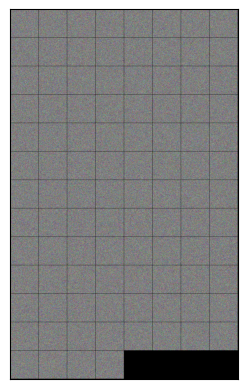

In [9]:
import os
from torchvision.utils import make_grid

from utils import save

data_DAM_args = DataDAMArgs()
data_DAM_args.init = 'noise'
data_DAM_args.save_path = 'MHIST_syn/noise/'

syn_path = os.path.join(data_DAM_args.save_path, 'res_%s_%s_%s_%dipc_.pt'%(data_DAM_args.method, data_DAM_args.dataset, data_DAM_args.model, data_DAM_args.ipc))
syn_dict = torch.load(syn_path)

image_syn = syn_dict['data'][-1][0]
label_syn = syn_dict['data'][-1][1]

grid = make_grid(image_syn.detach().cpu())
save(grid, './mhist_syn_noise.png')

# 2e)

In [2]:
import os

data_DAM_args = DataDAMArgs()

syn_path = os.path.join(data_DAM_args.save_path, 'res_%s_%s_%s_%dipc_.pt'%(data_DAM_args.method, data_DAM_args.dataset, data_DAM_args.model, data_DAM_args.ipc))
syn_dict = torch.load(syn_path)

image_syn = syn_dict['data'][-1][0]
label_syn = syn_dict['data'][-1][1]

evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MHIST', 'ConvNet', 'ConvNet', 10)

channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = dataset_func('MHIST', 'mhist_dataset/')
ConvNet_7 = network_func('ConvNet', channel, num_classes, im_size)

_, acc_train, acc_test = evaluate(0, ConvNet_7, image_syn, label_syn, testloader, args = evaluate_args)

C:\Users\colin\AppData\Local\Temp\ipykernel_11644\3178953402.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  syn_dict = torch.load(syn_path)


[2024-11-02 15:28:32] Evaluate_00: epoch = 0001 train time = 0 s train loss = 0.696228 train acc = 0.4900, test acc = 0.4524


# 3

In [ ]:
import os

data_DAM_args = DataDAMArgs()

resize_size = (28, 28)

syn_path = os.path.join(data_DAM_args.save_path, 'res_%s_%s_%s_%dipc_.pt'%(data_DAM_args.method, data_DAM_args.dataset, data_DAM_args.model, data_DAM_args.ipc))
syn_dict = torch.load(syn_path)

image_syn = transforms.Resize(resize_size)(syn_dict['data'][-1][0])
label_syn = syn_dict['data'][-1][1]

evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MHIST', 'ResNet18', 'ResNet18', 10)

channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = dataset_func('MHIST', 'mhist_dataset/', resize_size)
ResNet18 = get_network('ResNet18', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ResNet18, image_syn, label_syn, testloader, evaluate_args)

C:\Users\colin\AppData\Local\Temp\ipykernel_12900\1342697468.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  syn_dict = torch.load(syn_path)


[2024-11-02 16:04:21] Evaluate_00: epoch = 0020 train time = 1 s train loss = 0.141966 train acc = 1.0000, test acc = 0.5507


# 4

In [ ]:
evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MHIST', 'ConvNet', 'ConvNet', 10)

channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = dataset_func('MHIST', 'mhist_dataset/')

images_all = [torch.unsqueeze(dst_train[i][0], dim=0) for i in range(len(dst_train))]
labels_all = [dst_train[i][1] for i in range(len(dst_train))]
images_all = torch.cat(images_all, dim=0)
labels_all = torch.tensor(labels_all, dtype=torch.long)

In [ ]:
ConvNetD1 = get_network('ConvNetD1', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD1, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetD2 = get_network('ConvNetD2', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD2, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetD4 = get_network('ConvNetD4', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD4, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW32 = get_network('ConvNetW32', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW32, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW64 = get_network('ConvNetW64', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW64, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW256 = get_network('ConvNetW256', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW256, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
import os

data_DAM_args = DataDAMArgs()

syn_path = os.path.join(data_DAM_args.save_path, 'res_%s_%s_%s_%dipc_.pt'%(data_DAM_args.method, data_DAM_args.dataset, data_DAM_args.model, data_DAM_args.ipc))
syn_dict = torch.load(syn_path)

image_syn = syn_dict['data'][-1][0]
label_syn = syn_dict['data'][-1][1]

evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MHIST', 'ResNet18', 'ResNet18', 10)

In [ ]:
ConvNetD1 = get_network('ConvNetD1', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD1, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetD2 = get_network('ConvNetD2', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD2, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetD4 = get_network('ConvNetD4', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetD4, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW32 = get_network('ConvNetW32', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW32, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW64 = get_network('ConvNetW64', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW64, images_all, labels_all, testloader, args = evaluate_args)

In [ ]:
ConvNetW256 = get_network('ConvNetW256', channel, num_classes, im_size)
_, acc_train, acc_test = evaluate(0, ConvNetW256, images_all, labels_all, testloader, args = evaluate_args)